In [1]:
import pandas as pd
d= pd.read_csv('02Students.csv')
d

,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42
5,2,8,45
6,2,6,38
7,3,6,45
8,3,7,53
9,3,7,46


In [3]:
# split the data vertically into X and Y
X= d.iloc[:, :-1]
Y= d.iloc[:, -1]
#split the dataset by rows into training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

In [4]:
#create and train multiple regression model
from sklearn.linear_model import LinearRegression
#create regressor
std_reg = LinearRegression()
#train or fit the training data
std_reg.fit(x_train,y_train)

LinearRegression()

In [5]:
#prediction or predict values
y_predict = std_reg.predict(x_test)
y_predict

array([45.76085662, 55.91055579, 46.57952582, 41.50467624, 88.56916066,
       50.8357062 , 46.57952582, 79.2381307 , 65.24158575])

In [6]:
# R-squared and equation of line
mlr_score = std_reg.score(x_test,y_test)
mlr_score

0.9014449991870029

In [7]:
# coefficient of the line
mlr_coefficient =std_reg.coef_
mlr_intercept=std_reg.intercept_
mlr_coefficient


array([4.66551498, 5.07484959])

In [8]:
mlr_intercept

1.3152141538094995

In [9]:
# equation 1.31 + 4.67*h + 5.1*sh

In [10]:
# how much error our model has made
#RMSE
from sklearn.metrics import mean_squared_error
import math
mlr_rmse = math.sqrt(mean_squared_error(y_test,y_predict))
mlr_rmse

5.755363941612018

In [15]:
# Auto-correlation
import matplotlib.pyplot as plt
f=pd.read_csv('corr.csv')
f

,t0
0,8
1,14
2,36
3,56
4,84
5,94
6,106
7,110
8,93
9,67


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.18266407, 0.24523169, 0.3102569 , 0.37862065, 0.4524715 ,
        0.5446227 , 0.65713006, 0.7718786 , 0.879378  , 0.96169895,
        1.        , 0.96169895, 0.879378  , 0.7718786 , 0.65713006,
        0.5446227 , 0.4524715 , 0.37862065, 0.3102569 , 0.24523169,
        0.18266407], dtype=float32),
 <matplotlib.lines.Line2D at 0x1c36b601eb0>)

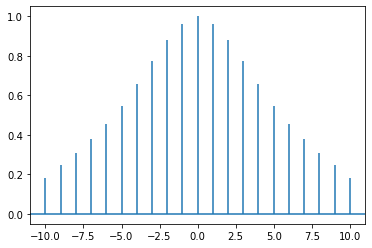

In [16]:
f['t0'] =pd.to_numeric(f['t0'],downcast='float') # convert the column t0 to float format
plt.acorr(f['t0'],maxlags=10)

In [17]:
# using pandas shift function to create time-lag data set
t_1=f['t0'].shift(+1).to_frame() #to_frame will convert the result to dataframe
t_2=f['t0'].shift(+2)
